## Code to prepare the moon data for training

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from PIL import Image

In [3]:
Image.MAX_IMAGE_PIXELS = 372412986

In [4]:
cd ../moon_data/Moon_WAC_Training/images

/home/val22/moon_data/Moon_WAC_Training/images


In [5]:
images = []
inames = ['Lunar_A.jpg', 'Lunar_B.jpg', 'Lunar_C.jpg', 'Lunar_D.jpg']

for i in inames:
    image = Image.open(i)
    images.append(image)
    

In [6]:
cd ..

/home/val22/moon_data/Moon_WAC_Training


In [7]:
cd ..

/home/val22/moon_data


In [8]:
def split_image(image, size, step = None):
    ''' Takes an image in jpg format and converts it into smaller quadratic images of length "size" 
        and spacing "step" '''
    im = np.asarray(image)
    if step: 
        tiles = [im[x:x+size,y:y+size] for x in range(0,im.shape[0],step) for y in range(0,im.shape[1],step)]
    else: 
        tiles = [im[x:x+size,y:y+size] for x in range(0,im.shape[0],size) for y in range(0,im.shape[1],size)]

    return tiles

In [9]:
tiles = split_image(images[0], 416)
len(tiles)

2178

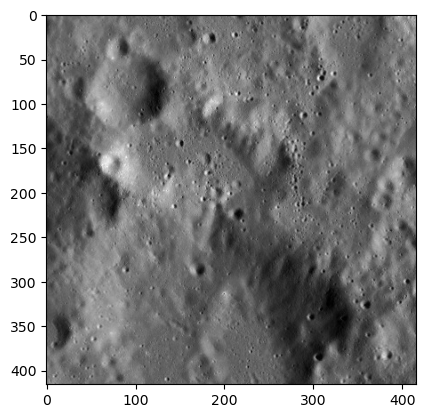

In [10]:
plt.imshow(tiles[0], cmap = 'gray')

In [11]:
labels = pd.read_csv('Moon_WAC_Training/labels/lunar_crater_database_robbins_train.csv')\
            [['LAT_CIRC_IMG', 'LON_CIRC_IMG', 'DIAM_CIRC_IMG']]

In [12]:
def label_data_for_image(max_lon, min_lon, max_lat, min_lat):
    # get the data for the image
    data = labels[(labels['LAT_CIRC_IMG'] >= min_lat) & (labels['LAT_CIRC_IMG'] < max_lat) \
                  & (labels['LON_CIRC_IMG'] >= min_lon) & (labels['LON_CIRC_IMG'] < max_lon)].copy()

    # add pixel dimensions
    data['lat (px)'] = (abs(data['LAT_CIRC_IMG'])) / 45 * images[0].size[1]
    data['lon (px)'] = ((data['LON_CIRC_IMG'] + abs(min_lon))/90) * images[0].size[0]
    data['diam (px)'] = (data['DIAM_CIRC_IMG'] *10) 
    return data
    

In [13]:
A_labels = label_data_for_image(-90, -180, 0, -90)
A_labels.head()

,LAT_CIRC_IMG,LON_CIRC_IMG,DIAM_CIRC_IMG,lat (px),lon (px),diam (px)
0,-19.830400,-95.243,940.96000,6013.017956,25701.147633,9409.6000
3,-35.602400,-151.514,505.31200,10795.438844,8637.904733,5053.1200
4,-4.383750,-157.472,429.66400,1329.250417,6831.240533,4296.6400
2896,-0.020326,-152.114,3.78691,6.163416,8455.964733,37.8691
3083,-0.000543,-147.586,1.07071,0.164690,9829.005267,10.7071


In [14]:
resolution = 0.1 # km per pixel
img_width = resolution * images[0].size[0]
img_height = resolution * images[0].size[1]
print(img_width, img_height)

2729.1000000000004 1364.5


In [15]:
(1737.4*2*np.pi)/4 # to check that these dimensions amount to 1/4 of the total circumference of the moon (longitude)

2729.1015381734533

In [16]:
(1737.4*2*np.pi)/8 # latitude is 1/8 because we only consider between 0 and 45

1364.5507690867266

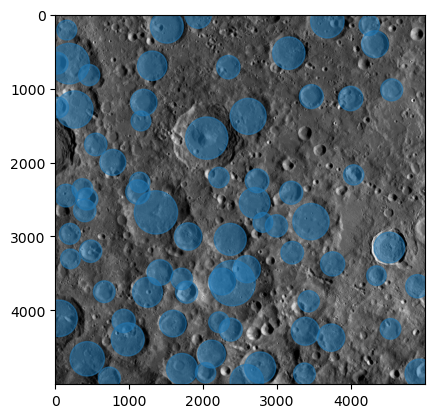

In [22]:
data = A_labels[(A_labels['lon (px)'] <= 5000) & (A_labels['lat (px)'] <= 5000) & (A_labels['diam (px)'] >= 200)]

plt.imshow(np.asarray(images[0])[:5000, :5000], cmap = 'gray')
plt.scatter(data['lon (px)'], data['lat (px)'], s = data['diam (px)'], alpha = 0.5)

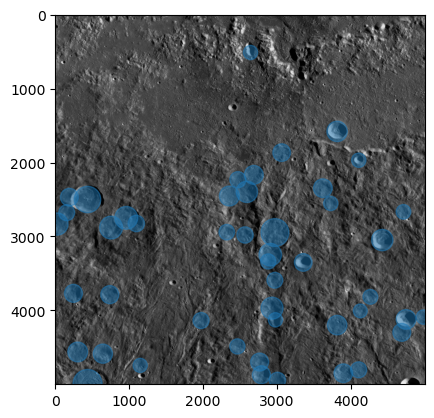

In [18]:
data = A_labels[(A_labels['lon (px)'] >= 22291) & (A_labels['lat (px)'] >= 8645) & (A_labels['diam (px)'] >= 100)]

plt.imshow(np.asarray(images[0])[8645:, 22291:], cmap = 'gray')
plt.scatter(data['lon (px)'] - 22291, data['lat (px)'] - 8645, s = data['diam (px)'], alpha = 0.5)

In [19]:
data.head()

,LAT_CIRC_IMG,LON_CIRC_IMG,DIAM_CIRC_IMG,lat (px),lon (px),diam (px)
115930,-33.7160,-93.916,21.6888,10223.440444,26103.538267,216.888
115931,-36.7545,-105.050,36.2552,11144.781167,22727.338333,362.552
116236,-40.9414,-105.677,16.8734,12414.342289,22537.211033,168.734
116237,-43.6329,-104.364,19.1896,13230.464900,22935.356400,191.896
116238,-39.5616,-95.426,16.3184,11995.956267,25645.655933,163.184


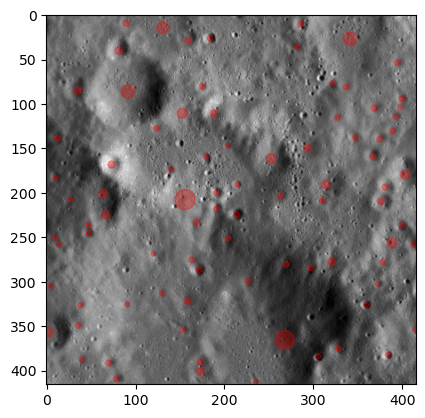

In [20]:
data = A_labels[(A_labels['lon (px)'] <= 416) & (A_labels['lat (px)'] <= 416)]

plt.imshow(np.asarray(images[0])[:416, :416], cmap = 'gray')
plt.scatter(data['lon (px)'], data['lat (px)'], c = 'r', s = data['diam (px)'], alpha = 0.3)

In [21]:
data

,LAT_CIRC_IMG,LON_CIRC_IMG,DIAM_CIRC_IMG,lat (px),lon (px),diam (px)
116252,-0.131292,-179.733,2.87408,39.810652,80.963300,28.7408
116253,-0.280295,-179.886,2.84800,84.991673,34.568600,28.4800
116254,-0.457631,-179.960,1.85597,138.763889,12.129333,18.5597
116255,-0.283499,-179.699,8.98827,85.963197,91.273233,89.8827
116256,-0.554846,-179.760,2.60043,168.241637,72.776000,26.0043
...,...,...,...,...,...,...
205129,-0.638261,-178.744,1.97972,193.534919,380.861067,19.7972
205130,-0.691620,-178.760,2.40806,209.714553,376.009333,24.0806
205131,-0.916085,-178.754,1.59641,277.777329,377.828733,15.9641
205132,-0.629071,-178.964,3.74836,190.748307,314.149733,37.4836
